In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, K):
        self.K = K
        self.max_iters = 100
        self.clusters=[]

    def fit(self, data):
        self.means = data[np.random.choice(range(data.shape[0]), size=self.K, replace=False)]
        print("First Mean")
        print(self.means)
        
        
        for _ in range(self.max_iters):
            classifications = np.argmin([np.linalg.norm(data - m, axis=1) for m in self.means], axis=0)
            self.clusters.append(classifications)
            print("clusters de départ")
            print(classifications)
            new_means = np.array([data[classifications == k].mean(axis=0) for k in range(self.K)])
            
            print("Approximative mean")
            print(new_means)
            
            if np.all(self.means == new_means):
                break
            self.means = new_means
            print("New mean")
            print(self.means)
        return self


In [3]:
data = np.genfromtxt("ushape.csv", delimiter=",")
print("Forme des données:", data.shape)
print("Premières lignes du fichier CSV:")
print(data[:5])

Forme des données: (100, 3)
Premières lignes du fichier CSV:
[[ 0.03159499  0.98698776  0.        ]
 [ 2.11509784 -0.04624397  1.        ]
 [ 0.88248972 -0.07575606  0.        ]
 [-0.0551441  -0.03733246  1.        ]
 [ 0.82954503 -0.53932149  1.        ]]


In [4]:
kmeans = KMeans(K=3)

kmeans.fit(data)

predictions = kmeans.clusters[-1]


First Mean
[[0.32118546 0.28668667 0.        ]
 [0.12412421 1.00062892 0.        ]
 [0.06873258 0.56648467 1.        ]]
clusters de départ
[1 0 0 2 2 2 0 0 2 2 2 0 0 1 0 1 1 1 1 0 1 2 0 2 0 0 0 0 0 2 2 0 0 2 2 1 1
 2 2 0 0 2 0 0 0 1 1 1 0 0 2 2 0 1 0 2 1 0 1 2 0 1 2 2 2 2 1 0 0 0 1 1 0 0
 2 2 1 2 2 0 1 1 2 1 0 2 2 0 0 2 0 1 1 0 0 2 2 2 1 0]
Approximative mean
[[ 0.76851501 -0.01920439  0.4       ]
 [-0.08466852  0.95922172  0.        ]
 [ 0.63243389 -0.03827851  1.        ]]
New mean
[[ 0.76851501 -0.01920439  0.4       ]
 [-0.08466852  0.95922172  0.        ]
 [ 0.63243389 -0.03827851  1.        ]]
clusters de départ
[1 0 0 2 2 0 0 2 2 2 1 2 2 1 1 1 1 1 1 0 1 2 1 2 1 1 0 0 2 2 2 2 2 2 2 1 1
 2 2 2 0 2 1 1 0 1 1 1 1 0 2 2 0 1 0 2 1 1 1 2 1 1 2 2 2 2 1 2 0 0 1 1 1 0
 0 2 1 2 2 2 1 1 2 1 1 2 2 0 2 2 2 1 1 2 0 2 2 2 1 1]
Approximative mean
[[ 1.277322    0.23796919  0.33333333]
 [-0.21529173  0.70494794  0.02564103]
 [ 0.82433843 -0.20712314  1.        ]]
New mean
[[ 1.277322    0.2379691

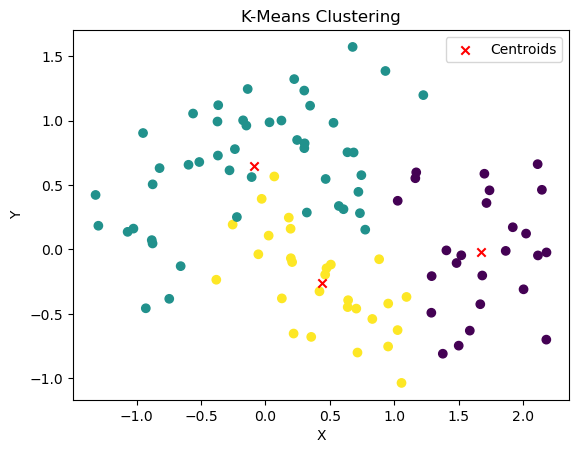

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=predictions)
plt.scatter(kmeans.means[:, 0], kmeans.means[:, 1], c='red', marker='x', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()